### Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
all_cars_df = pd.read_csv( "new_used_car.csv" )

In [4]:
all_cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,make,model,mileage_new,engine_new,power_new
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,maruti,wagon,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,hyundai,creta,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,honda,jazz,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,maruti,ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,audi,a4,15.20,1968.0,140.80


### Removing Outliers

In [5]:
cars_df = all_cars_df[(all_cars_df.Price <= 30) &
                      (all_cars_df.Kilometers_Driven <= 200000)]

In [6]:
#cars_df = cars_df[cars_df.Year > 2010]

### Feature Set Selection

In [7]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'make', 'model', 'mileage_new', 'engine_new',
       'power_new'],
      dtype='object')

In [8]:
x_features = ['Year', 'Kilometers_Driven', 'Fuel_Type',
              'Transmission', 'Owner_Type', 'Seats',
              'make', 'mileage_new', 'engine_new',
              'power_new']

In [9]:
cat_features = ['Year', 'Fuel_Type',
                'Transmission', 'Owner_Type', 
                'make']

In [10]:
num_features = list(set(x_features) - set(cat_features))

In [11]:
num_features

['Kilometers_Driven', 'mileage_new', 'power_new', 'engine_new', 'Seats']

### Dropping Null Values

In [12]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [13]:
cars_df.shape

(5499, 11)

### Encode Categorical Variables

In [14]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=cat_features)

In [15]:
encoded_cars_df.sample(5)

,Kilometers_Driven,Seats,mileage_new,engine_new,power_new,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,...,make_mini,make_mitsubishi,make_nissan,make_porsche,make_renault,make_skoda,make_tata,make_toyota,make_volkswagen,make_volvo
4283,57539,5.0,22.32,1582.0,126.32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2772,61600,5.0,17.10,1591.0,121.30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3028,61108,7.0,10.91,3198.0,197.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,57000,5.0,26.59,1248.0,74.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1161,1000,5.0,20.30,1199.0,84.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
encoded_cars_df.columns

Index(['Kilometers_Driven', 'Seats', 'mileage_new', 'engine_new', 'power_new',
       'Year_1998', 'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'make_ambassador', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_datsun', 'make_fiat', 'make_force',
       'make_ford', 'make_honda', 'make_hyundai', 'make_isuzu', 'make_jaguar',
       'make_jeep', 'make_land', 'make_mahindra', 'make_maruti',
       'make_mercedes-benz', 'make_mini', 'make_mitsubishi', 'make_nissan',
       'make_porsche', 'make_renaul

### Setting X and y variables

In [17]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state= 100)

In [20]:
X_train.shape

(4399, 64)

In [21]:
X_test.shape

(1100, 64)

### Linear Models

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lreg_v1 = LinearRegression()

In [24]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Predict on test set

In [25]:
y_pred = lreg_v1.predict(X_test)

In [26]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_test - y_pred})

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [29]:
mse_v1

5.907967566386115

In [30]:
rmse_v1 = np.sqrt(mse_v1)

In [31]:
rmse_v1

2.430631104545919

In [32]:
r2_score(y_test, y_pred)

0.8262725852856775

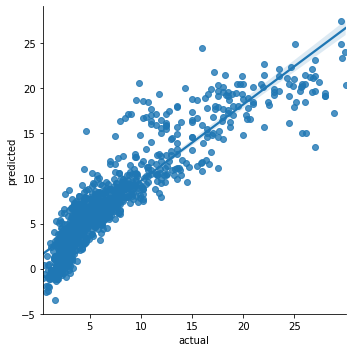

In [33]:
sn.lmplot(data = y_df,
          x = 'actual',
          y = 'predicted');

### Preprocessing data based on business context

1. Removing all cars prior to 2011
2. Making an adjustment to price based on inflation rate. But we need to know the year of sale (not available)
3. Adding the car model as a feature (need to prepare data properly)
4. Taking log of the price (as price is skewed distribution)

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
scores = cross_val_score(LinearRegression(),
                         X_train,
                         y_train,
                         cv = 10,
                         scoring = 'r2')

In [36]:
scores

array([0.82038166, 0.84004928, 0.8499967 , 0.8295481 , 0.85324094,
       0.80757563, 0.77958161, 0.81215436, 0.84366541, 0.84089473])

In [37]:
scores.mean()

0.8277088423287594

In [38]:
scores.std()

0.021794476165914105

### Saving the model

In [39]:
class CarPredictionModel():
    
    def __init__(self, model, features):
        self.model = model
        self.features = features

In [40]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns))

In [41]:
from joblib import dump

In [42]:
dump(my_model, './cars.pkl')

['./cars.pkl']

### Tasks

1. Removing all cars prior to 2011
2. Taking log of the price (as price is skewed distribution)
3. Build a new model
4. Predict on test set and measure the accuracy (RMSE and R Squared)